<h1>TRABAJO PRÁCTICO Nº2</h1>
<h3>Joaquín Varela - Pablo Emanuel Muia - Juan Augusto Dimitroff Balderrama</h3>

In [1]:
import audio_functions as auf
import filters_bank as fb
import plot
import data_analysis_functions as daf

<h1>Objetivo</h1>

En este trabajo buscamos obtener la descripción acústica de un aula de clases en la Sede II de la Universidad Nacional de Tres de Febrero. Para realizar dicha descripción, primero necesitamos realizar una medición de la respuesta al impulso del recinto, para lo cual utilizamos el método normado de barrido frecuencial. Estas mediciones pueden ayudar a determinar cómo se comporta el sonido en el recinto, incluyendo la distribución de energía en diversas frecuencias, los tiempos de reverberación y otros parámetros acústicos.

A continuación se muestra el esquema para la obtención de la respuesta al impulso:

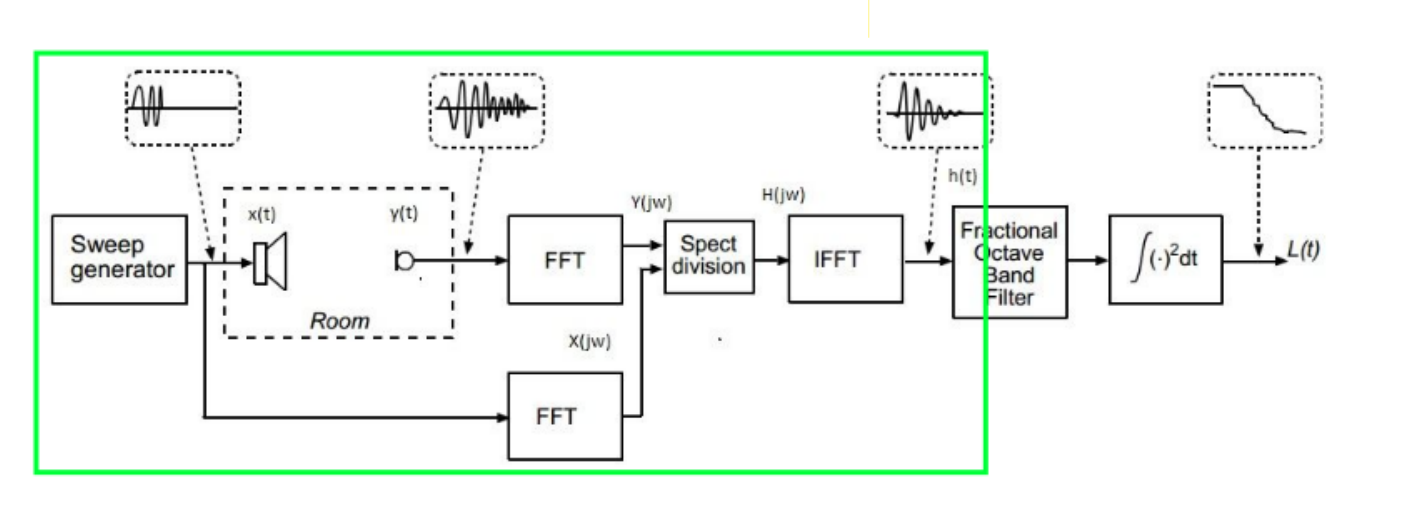

<h2>Normas</h2>

El término "normado" se refiere a que se siguen estándares específicos o normas en el proceso de medición para garantizar que los resultados sean comparables y consistentes. Las normas que tuvimos en cuenta para la realización de este trabajo fueron las siguientes:

>ISO 61260 ("Octave-band and fractional-octave-band filters," International Organization for Standardization, Estándar, 2000)

>ISO 3382-2 ("Measurement of room acoustic parameters. Part 2: Reverberation time in ordinary rooms," International Organization for Standardization, Estándar, octubre de 2009).

<h2>Mediciones</h2>

Primero, se tuvo que medir el nivel de ruido ambiental del recinto utilizando el sonómetro, ya que este puede interferir con las señales acústicas utilizadas en las mediciones. Por lo tanto, es necesario asegurarse de que el nivel de ruido ambiental esté lo suficientemente alejado del nivel producido por el sistema utilizado para la medición. Una vez verificado el nivel de ruido ambiental, se procedió a obtener la respuesta al impulso, asegurando que la fuente emisora sea capaz de producir un nivel determinado por encima del nivel de ruido de fondo.

Manteniendo el sistema en las mismas condiciones en las que fue utilizado para medir las respuestas al impulso (ganancias, sistema de grabación, posiciones micrófono-fuente), se realizaron 3 mediciones adicionales:

>18 segundos de grabación del ruido de fondo.

>5 segundos de grabación de la fuente emitiendo ruido rosa.

>5 segundos de grabación de la señal del calibrador.

<h2>Equipo utilizado</h2>

En el trabajo se han empleado los siguientes componentes de hardware:

>Parlante potenciado JBL EON 515XT

>Medidor de distancia láser BOSCH DLE 70

>Sonómetros Svantek SVAN 959 con calibrador (2 unidades)

>Micrófono de Medición Earthworks M50 (2 unidades)

>Micrófono de Medición Behringer EMC 8000 (4 unidades)

>Pie de micrófono (6 unidades)

>Notebook HP i7, 16GB de RAM

>Interface Motu 896 MK3 Hybrid de 8 canales de entrada

<h2>Posicionamiento</h2>

La disposición de los micrófonos y la fuente están representados en los gráficos a continuación:

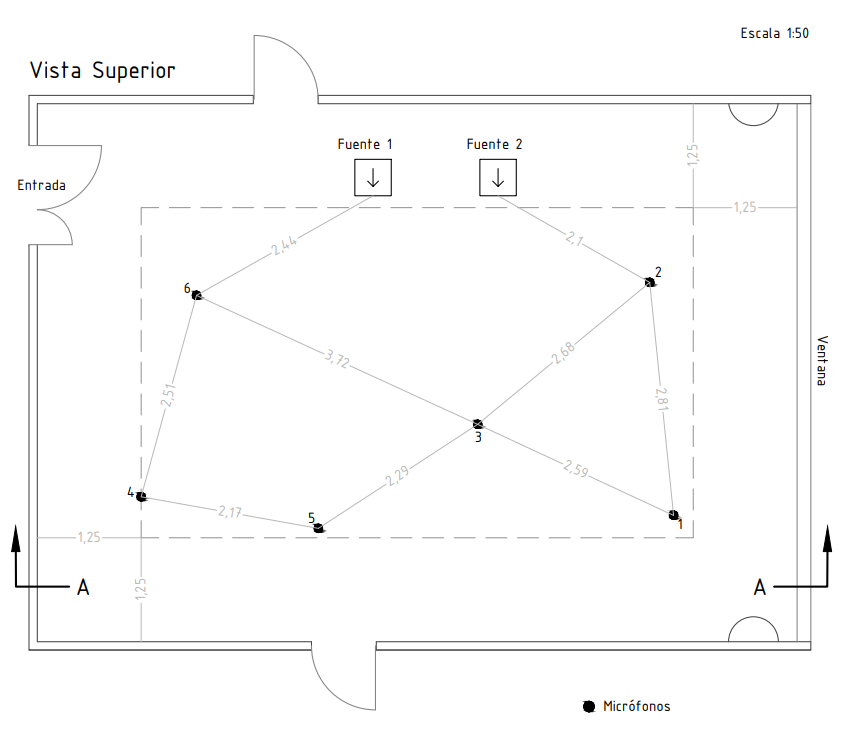

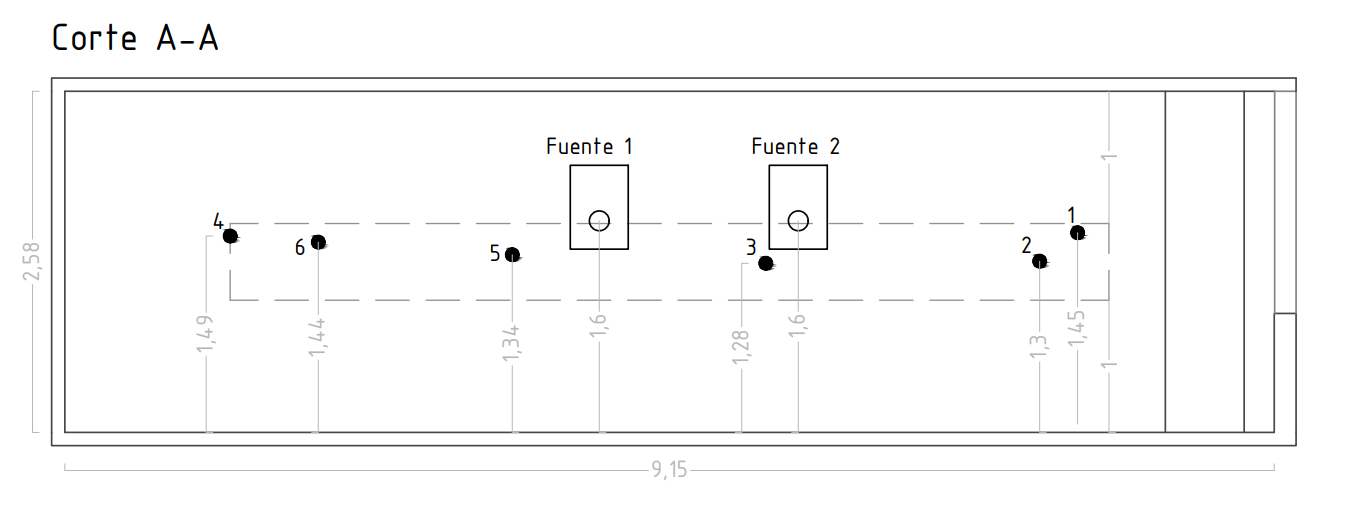

# Observaciones sobre el recinto

Se trataba de un aula de clases común y corriente, más precisamente del Taller de Electrónica. Este se encontraba con varias mesas y sillas en su interior, que fueron reubicadas para las mediciones. También había casilleros y materiales de madera a un costado, pero lo consideramos como un solo material con un solo coeficiente de absorción. Otro detalle a resaltar es que había tres ventanas de gran tamaño, pero permanecieron cerradas durante toda la medición.

# Código

In [ ]:
#CODIGO PARA BARRIDO LOGARITMICO

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio 
import scipy as sp
from scipy.signal import chirp

#Parametros
duration = 25 # segundos
start_freq = 70# Hz
end_freq = 6000 # Hz
fs = 48000 # muestras por segundos

time = np.linspace(0, duration, duration*fs)

#Generar señal sinesweet logarítmica
signal = 0.5*chirp(time, f0=start_freq, f1=end_freq, t1=duration, method='logarithmic', phi=-90)


nombre_del_archivo = "seno_logaritmico_25seg.wav"
sf.write(nombre_del_archivo, signal, fs)

#Graficar señal sinesweet logarítmica
plt.figure(figsize=(16, 6))
plt.plot(time, signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,0.1)
plt.title('Barrido sinesweet logarítmico')
plt.show()
Audio(signal, rate=fs)


In [ ]:
# CODIGO PARA VERIFICACION ESPECTRAL DEL SINESWEET

def espectro_frecuencial(audio, fs,N=1,xlim=(20,20000),ylim=(-120,10),title='espectro frecuencial'):
    """
    Plots the frequency spectrum of an audio signal.

    Args:
        audio (numpy.ndarray): An array of audio samples.
        fs (float): The sampling frequency in Hz.
        N (int, optional): The number of samples to use for smoothing. Defaults to 1.
        xlim (tuple, optional): The x-axis limits in Hz. Defaults to (20, 20000).
        ylim (tuple, optional): The y-axis limits in dB. Defaults to (-120, 10).

    Returns:
        None
    """
    fft_raw = np.fft.fft(audio)
    fft = fft_raw[:len(fft_raw)//2]
    fft_mag = abs(fft) #/ len(fft)


    freqs = np.linspace(0, fs/2, len(fft))

    fft_mag_norm = fft_mag / np.max(abs(fft_mag))
    eps = np.finfo(float).eps
    fft_mag_db = 20*np.log10(fft_mag_norm + eps)
    
    #suavizado
    ir = np.ones(N)*1/N # respuesta al impulso de MA
    smoothed_signal = sp.signal.fftconvolve(fft_mag_db, ir, mode='same')
    #ploteo
    plt.figure(figsize=(15,5))
    
    plt.semilogx(freqs, smoothed_signal)
    ticks = [63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000, 24000]
    plt.xticks([t for t in ticks], [f'{t}' for t in ticks])
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.title(title)
    plt.grid()
    plt.show()
    return 

espectro_frecuencial(signal, fs,N=1,xlim=(20,20000),ylim=(-120,10),title='espectro frecuencial')

In [ ]:
#CODIGO PARA RUIDO ROSA
import numpy as np
from scipy.io.wavfile import write
import soundfile as sf

duration = 25  # seconds
sample_rate = 48000  # Hz

samples = np.random.normal(0, 1, int(duration * sample_rate))
samples /= np.max(np.abs(samples))

nombre_del_archivo = "ruido_rosa.wav"
sf.write(nombre_del_archivo, samples, sample_rate)

# Aclaraciones pertinentes

Se cometió un error a la hora de realizar el código para el ruido rosa, finalmente terminamos utilizando ruido blanco sin percatarnos. Debido a esto, se va a emular el ruido rosa empleando filtros para que generen un decaimiento en dB similar al buscado. Todas las grabaciones se realizaron una frecuencia de sampleo de 48000 Hz.

# Filtros utilizados

La normativa ISO 3382-2 indica analizar las frecuencias de 125 Hz a 4000 Hz en bandas de octavas y de 100 Hz a 5000 Hz en bandas de tercios de octavas. El cociente de octavas utilizado es en base 2 debido a la simpleza de calculos.

In [2]:
nominal_oct_central_freqs = [125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0]
exact_oct_central_freqs = [125.0, 250.0, 500.0, 1000.0, 2000.0, 4000.0]
nominal_thirds_central_freqs = [100, 125.0, 160.0, 200.0, 250.0, 315.0, 400.0, 500.0, 630.0, 800.0, 1000.0, 1250.0, 1600.0, 2000.0, 2500.0, 3150.0, 4000.0, 5000.0]
exact_thirds_central_freqs = [99.123, 125.0, 157.49, 198.43, 250.0, 314.98, 396.85, 500.0, 628.96, 793.7, 1000.0, 1259.9, 1587.4, 2000.0, 2519.8, 3174.8, 4000.0, 5039.7]

Se realizó un banco de filtros para bandas de octavas y bandas de tercios de octavas centradas en dichas frecuencias para realizar el análisis espectral reglamentado por la norma ISO 3382-2.

In [3]:
octave_filters_bank = []
thirds_filters_bank = []

for f in exact_oct_central_freqs:
    pol_coef = fb.create_octave_filter(f, 48000)
    octave_filters_bank.append(pol_coef)

for f in exact_thirds_central_freqs:
    pol_coef = fb.create_third_octave_filter(f, 48000)
    thirds_filters_bank.append(pol_coef)

A continuación se muestra la respuesta en frecuencia correspondiente a cada filtro

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


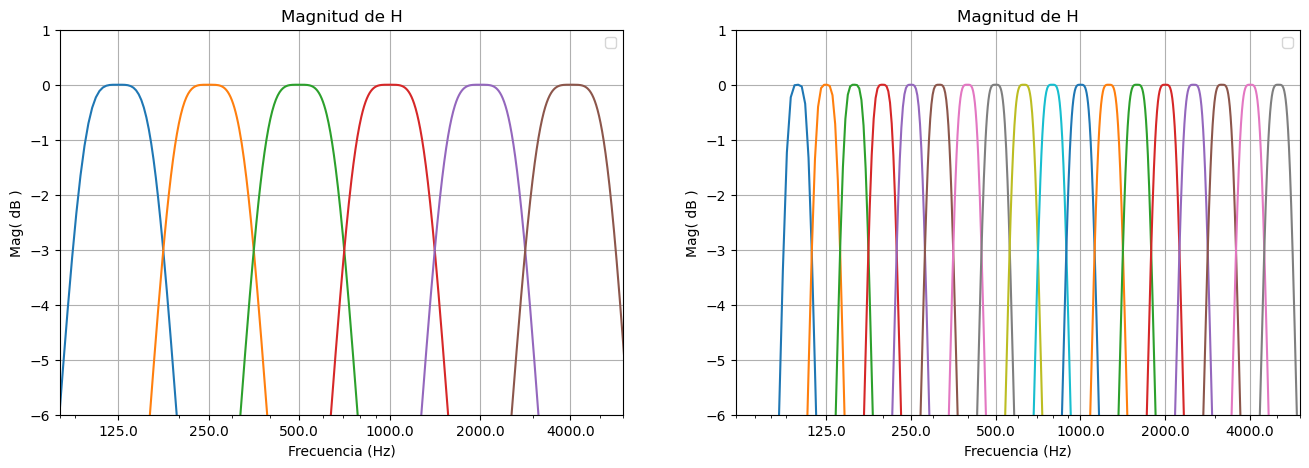

In [5]:
resp_en_freq_octavas = lambda: plot.plot_ftf(octave_filters_bank, 48000, f_lim=[80, 6000], show=False)
resp_en_freq_tercios = lambda: plot.plot_ftf(thirds_filters_bank, 48000, f_lim=[60, 6000], show=False)

plot.multiplot(resp_en_freq_octavas, resp_en_freq_tercios, figsize=(16, 5))

<h1>Análisis Espectral</h1>

El objetivo del análisis espectral en una medición es asegurarse de que la fuente pueda emitir a un nivel mayor que el piso de ruido. La norma indica que esta diferencia tiene que ser de al menos 35 dB en todas las bandas de análisis, por lo que es necesario observar el comportamiento únicamente en las bandas de frecuencias mencionadas previamente. 

Comenzamos la medición calibrando los micrófonos con un tono puro de 1KHz a 94 dBSPL para ajustar la ganancia de cada canal. Utilizamos la grabación del mismo para usar como escalado de amplitud y llevar todas las grabaciones a una escala en pascales. 
Es importante aclarar que cada vez que se va a llevar una grabación a escala en pascales o dB SPL, la referencia que debe utilizarse es la calibración del micrófono que hizo esa grabación. 

In [6]:
tono_calibrador_1, tono_calibrador_1_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 1 - Earthworks M30_01.wav")
tono_calibrador_2, tono_calibrador_2_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 2 - Earthworks M30_02.wav")
tono_calibrador_3, tono_calibrador_3_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 3 - Behringer ecm 8000_04.wav")
tono_calibrador_4, tono_calibrador_4_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 4 - Behringer ecm 8000_03.wav")
tono_calibrador_5, tono_calibrador_5_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 5 - Behringer ecm 8000_03.wav")
tono_calibrador_6, tono_calibrador_6_fs = auf.load_audio("1 - CALIBRACION DE MICROFONOS A 94dB SPL/MIC 6 - Behringer ecm 8000_03.wav")

calibraciones = {
    "1":tono_calibrador_1,
    "2":tono_calibrador_2,
    "3":tono_calibrador_3,
    "4":tono_calibrador_4,
    "5":tono_calibrador_5,
    "6":tono_calibrador_6
}

<h2>Piso de ruido</h2>


Se tomaron muestras del piso de ruido con todos los mícrofonos. Nuestro parámetro de interés es el nivel sonoro continuo equivalente (LEQ), que es el nivel sonoro medido de un ruido supuestamente constante durante un intervalo de tiempo. A partir de las grabaciones calculamos el Leq de cada banda de análisis para todas las mediciones y calcularemos un promedio.

In [7]:
#cargo audios y obtengo el tiempo de duración. Solo necesito buscar el de un solo microfono ya que las grabaciones se hicieron en simultaneo
nf_1_rec, nf_1_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 1 - Earthworks M30_03.wav")
nf_2_rec, nf_2_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 2 - Earthworks M30_03.wav")
nf_3_rec, nf_3_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 3 - Behringer ecm 8000_05.wav")
nf_4_rec, nf_4_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 4 - Behringer ecm 8000_04.wav")
nf_5_rec, nf_5_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 5 - Behringer ecm 8000_04.wav")
nf_6_rec, nf_6_fs = auf.load_audio("2 - CASO 1 - AULA VACIA/2 - PISO DE RUIDO/MIC 6 - Behringer ecm 8000_04.wav")

nf_1_dur ,nf_1_time_array = auf.get_audio_time_array(nf_1_rec, nf_1_fs)
print(f"Las grabaciones duran {nf_1_dur} segundos")

Las grabaciones duran 18 segundos


In [8]:
lista_audios_nf = [nf_1_rec, nf_2_rec, nf_3_rec, nf_4_rec, nf_5_rec, nf_6_rec]

all_thirds_leq = []
all_octaves_leq = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(lista_audios_nf):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[str(i+1)])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[str(i+1)])

    all_thirds_leq.append(auf.np.array(thirds_leq))
    all_octaves_leq.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq = auf.np.array(all_thirds_leq)
all_octaves_leq = auf.np.array(all_octaves_leq)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


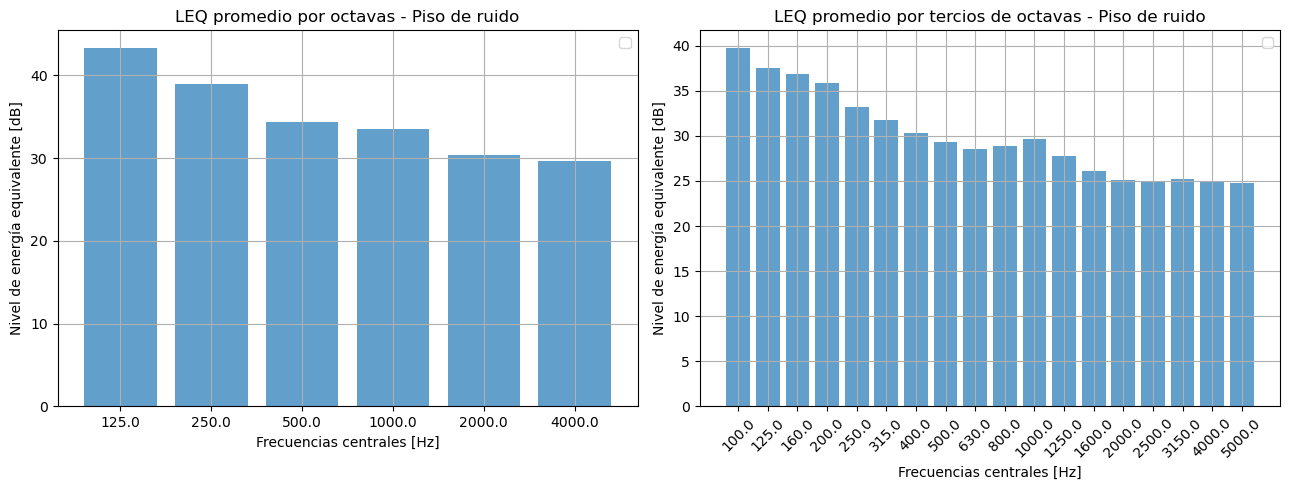

In [9]:
avg_octave_leq_nf = auf.np.mean(all_octaves_leq, axis=0)
avg_thirds_leq_nf = auf.np.mean(all_thirds_leq, axis=0)

all_octave_leq_plot = {"leq":avg_octave_leq_nf} 
all_thirds_leq_plot = {"leq":avg_thirds_leq_nf} 

title = ["LEQ promedio por octavas - Piso de ruido", "LEQ promedio por tercios de octavas - Piso de ruido"]
octaves_leq_plot =  lambda: plot.plot_leqs(all_octave_leq_plot, x=nominal_oct_central_freqs, title=title[0], show=False)
thirds_leq_plot =  lambda: plot.plot_leqs(all_thirds_leq_plot, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot, thirds_leq_plot, figsize=(13, 5)) 

A continuación realizamos el análisis sobre la precisión del piso de ruido medido. Utilizaremos los micrófonos 1 y 6 ya que estaban posicionados junto a un sonómetro cada uno. Las comparaciones a realizar son:

- Nivel sonoro continuo equivalente (LEQ) entre micrófono y sonómetro
- Nivel sonoro continuo equivalente (LEQ) entre micrófonos
- Nivel sonoro continuo equivalente (LEQ) entre sonómetros

In [10]:
#cargo valores de los sonómetros
thirds_sonometers_df, mr_sonometers_df = daf.load_sonometers_data("../datos sonometros/sonometros.xlsx")
mr_sonometers_df

,Medicion,Filter,Detector,Elapsed time,LZpeak,LZFmax,LZFmin,LZF(SPL),LZeq,LZE(SEL),Lden,Ltm3,LZFTeq,LEPd
0,PR - S1 - SG,Z,Fast,00:00:21,78.7,73.1,57.6,67.8,64.3,77.52,74.3,69.3,70.2,64.3
1,PR - S2 - SG,Z,Fast,00:00:23,77.1,73.3,54.6,66.5,63.4,77.02,73.4,68.7,70.2,63.4
2,PR - S1 - CG,Z,Fast,00:00:16,83.6,81.5,58.7,69.8,70.5,82.54,80.5,77.0,77.7,70.5
3,PR - S1 - SG,Z,Fast,00:00:17,83.5,81.6,57.0,73.0,70.5,82.80,80.5,76.7,77.8,70.5
4,RR - S2 - F1 - SG,Z,Fast,00:00:29,97.9,85.1,56.3,64.0,83.6,98.22,93.6,84.3,84.8,83.6
5,RR - S2 - F2 - CG,Z,Fast,00:00:28,96.9,86.4,62.5,75.9,82.7,97.17,92.7,84.1,84.9,82.7
6,RR - S2 - F2 - SG,Z,Fast,00:00:29,97.6,83.6,57.7,62.2,82.1,96.72,92.1,82.8,83.2,82.1


In [11]:
thirds_sonometers_df

,Frequency [Hz],PR - S1 - SG,PR - S2 - SG,PR - S1 - CG,PR - S2 - CG,RR - S2 - F1 - SG,RR - S2 - F2 - CG,RR - S2 - F2 - SG
0,0.80,52.9,52.9,61.2,62.0,50.2,63.3,50.5
1,1.00,55.9,55.8,61.9,61.2,49.4,65.4,49.6
2,1.25,54.8,54.3,57.4,56.9,47.8,62.2,45.9
3,1.60,49.7,52.5,60.4,60.4,48.8,62.5,47.8
4,2.00,51.9,52.7,58.3,58.1,48.2,56.8,49.5
5,2.50,49.8,49.3,54.9,54.4,51.0,55.1,47.0
6,3.15,50.0,49.8,51.0,51.1,55.9,50.5,46.3
7,4.00,46.9,46.9,48.1,48.6,48.1,47.6,44.8
8,5.00,42.3,41.9,45.1,46.9,39.3,44.1,42.0
9,6.30,36.3,37.5,39.6,40.5,36.5,41.2,39.2


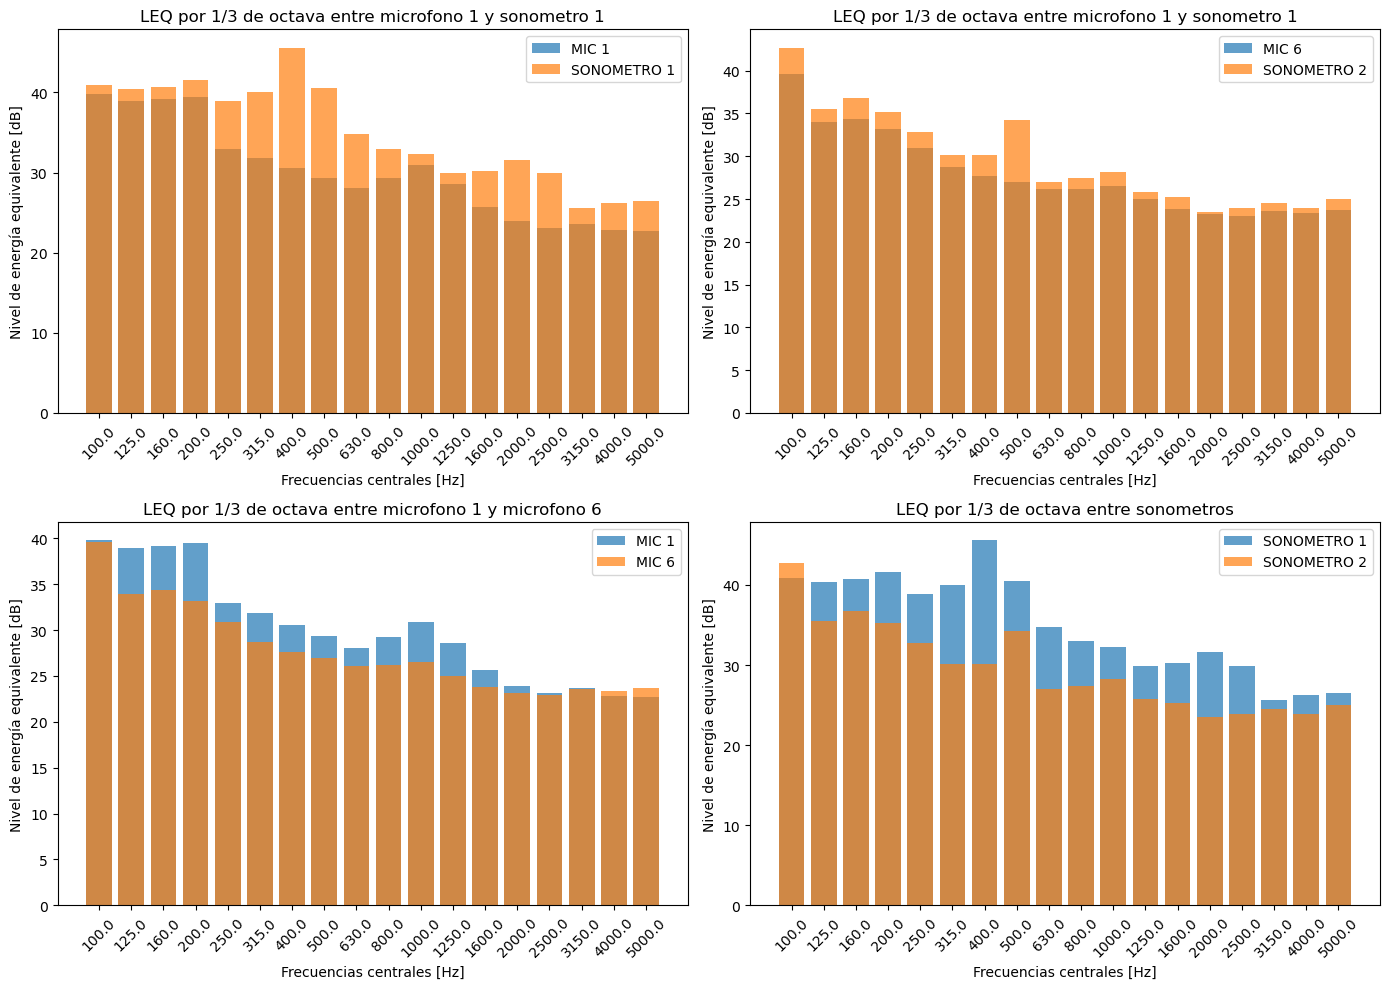

In [12]:
thirds_bands_leq_1 = auf.leq_by_bands(nf_1_rec, thirds_filters_bank, ref=tono_calibrador_1)
thirds_bands_leq_6 = auf.leq_by_bands(nf_6_rec, thirds_filters_bank, ref=tono_calibrador_6)

thirds_bands_leq_s1 = daf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "PR - S1 - SG")
thirds_bands_leq_s2 = daf.get_sonometer_leq(thirds_sonometers_df, nominal_thirds_central_freqs, "PR - S2 - SG")

#datos para graficar
mic1_thirds_leq_plot = {"leq":thirds_bands_leq_1, "label": "MIC 1"} 
s1_thirds_leq_plot = {"leq":thirds_bands_leq_s1, "label": "SONOMETRO 1"} 
mic6_thirds_leq_plot = {"leq":thirds_bands_leq_6, "label": "MIC 6"} 
s2_thirds_leq_plot = { "leq":thirds_bands_leq_s2, "label": "SONOMETRO 2"} 

titles={
    "1": "LEQ por 1/3 de octava entre microfono 1 y sonometro 1", 
    "2":"LEQ por 1/3 de octava entre microfono 1 y sonometro 1", 
    "3": "LEQ por 1/3 de octava entre microfono 1 y microfono 6", 
    "4": "LEQ por 1/3 de octava entre sonometros"
}

plot_m1_s1_thirds = lambda: plot.plot_leqs(mic1_thirds_leq_plot, s1_thirds_leq_plot, x=nominal_thirds_central_freqs, rotate=True, title=titles["1"], show=False)
plot_m6_s2_thirds = lambda: plot.plot_leqs(mic6_thirds_leq_plot, s2_thirds_leq_plot,  x=nominal_thirds_central_freqs, rotate=True, title=titles["2"], show=False)
plot_m1_m6_thirds = lambda: plot.plot_leqs(mic1_thirds_leq_plot, mic6_thirds_leq_plot,  x=nominal_thirds_central_freqs, rotate=True, title=titles["3"], show=False)
plot_s1_s2_thirds = lambda: plot.plot_leqs(s1_thirds_leq_plot, s2_thirds_leq_plot, x=nominal_thirds_central_freqs, rotate=True, title=titles["4"], show=False)

plot.multiplot(plot_m1_s1_thirds, plot_m6_s2_thirds, plot_m1_m6_thirds, plot_s1_s2_thirds, figsize=(14, 10))

Ahora analizo por bandas de octavas. Los datos devueltos por el sonómetro corresponden a la energía por tercios de octava, por lo que es necesario realizar la suma entre los tercios que corresponden a la misma banda. 

\begin{equation}
LEQ_{\text{octava}} = 10 \cdot \log_{10}\left(10^{\frac{LEQ_\text{1}}{10}} + 10^{\frac{LEQ_\text{2}}{10}} + 10^{\frac{LEQ_\text{3}}{10}}\right)
\end{equation}

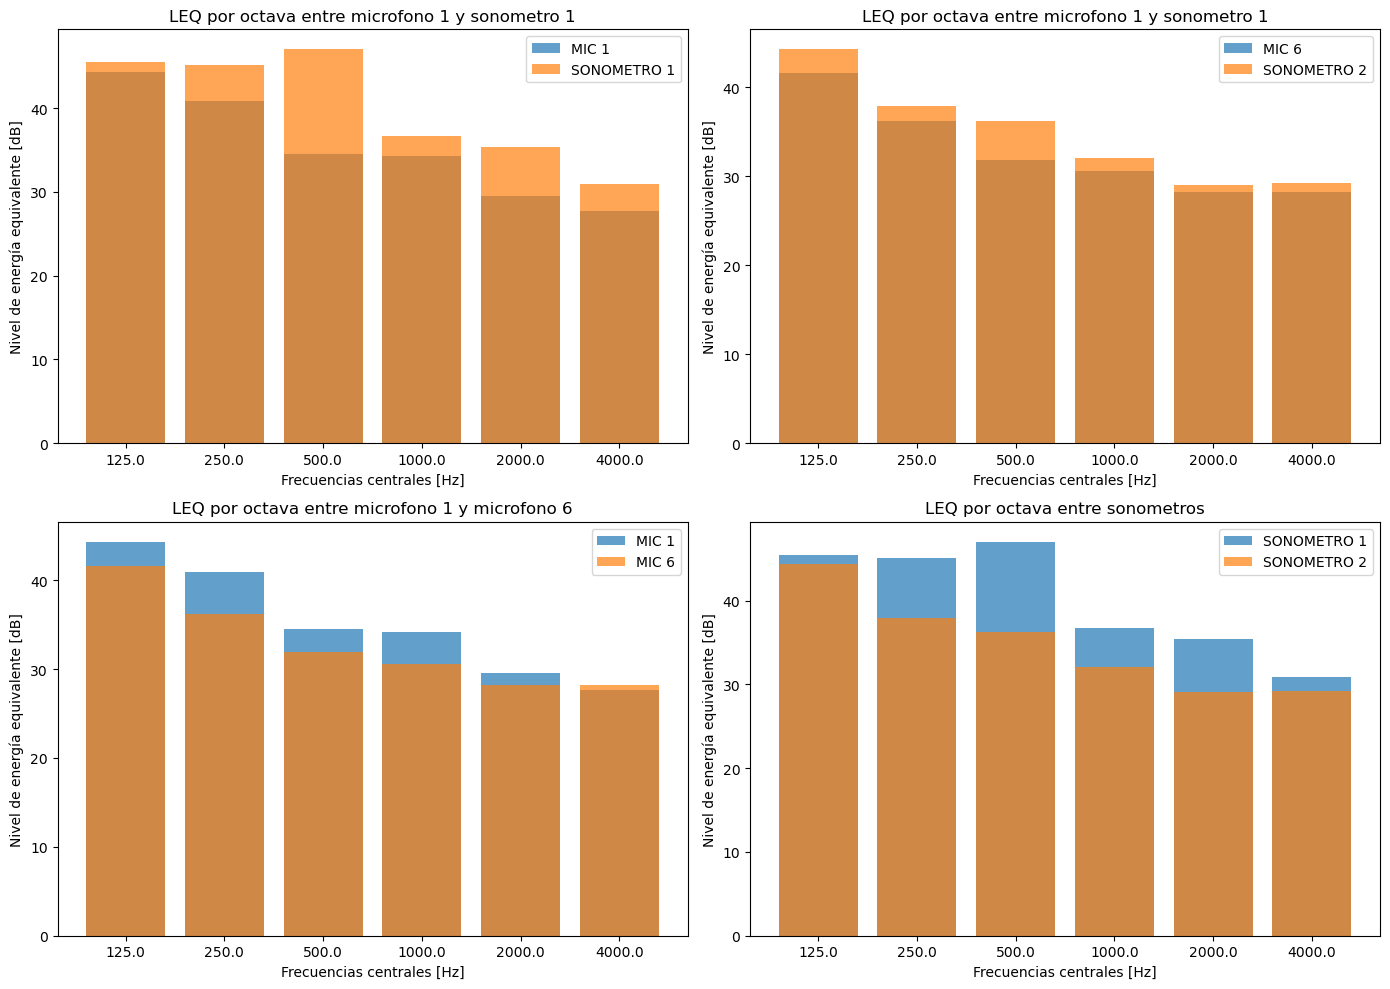

In [13]:
octave_bands_leq_1 = auf.leq_by_bands(nf_1_rec, octave_filters_bank, ref=tono_calibrador_1)
octave_bands_leq_6 = auf.leq_by_bands(nf_6_rec, octave_filters_bank, ref=tono_calibrador_6)

octave_bands_leq_s1 = []
octave_bands_leq_s2 = []

for i in range(0, 18, 3):
    octave_s1 = auf.sum_bands([thirds_bands_leq_s1[i], thirds_bands_leq_s1[i + 1], thirds_bands_leq_s1[i + 2]])
    octave_s2 = auf.sum_bands([thirds_bands_leq_s2[i], thirds_bands_leq_s2[i + 1], thirds_bands_leq_s2[i + 2]])

    octave_bands_leq_s1.append(octave_s1)
    octave_bands_leq_s2.append(octave_s2)

#datos para graficar
mic1_octaves_leq_plot = {"leq":octave_bands_leq_1, "label": "MIC 1"} 
mic6_octaves_leq_plot = {"leq":octave_bands_leq_6, "label": "MIC 6"} 
s1_octaves_leq_plot = {"leq":octave_bands_leq_s1, "label": "SONOMETRO 1"} 
s2_octaves_leq_plot = { "leq":octave_bands_leq_s2, "label": "SONOMETRO 2"} 

titles={
    "1": "LEQ por octava entre microfono 1 y sonometro 1", 
    "2":"LEQ por octava entre microfono 1 y sonometro 1", 
    "3": "LEQ por octava entre microfono 1 y microfono 6", 
    "4": "LEQ por octava entre sonometros"
}

plot_m1_s1_oct = lambda: plot.plot_leqs(mic1_octaves_leq_plot, s1_octaves_leq_plot, x=nominal_oct_central_freqs, title=titles["1"], show=False)
plot_m6_s2_oct = lambda: plot.plot_leqs(mic6_octaves_leq_plot, s2_octaves_leq_plot,  x=nominal_oct_central_freqs, title=titles["2"], show=False)
plot_m1_m6_oct = lambda: plot.plot_leqs(mic1_octaves_leq_plot, mic6_octaves_leq_plot,  x=nominal_oct_central_freqs, title=titles["3"], show=False)
plot_s1_s2_oct = lambda: plot.plot_leqs(s1_octaves_leq_plot, s2_octaves_leq_plot, x=nominal_oct_central_freqs, title=titles["4"], show=False)

plot.multiplot(plot_m1_s1_oct, plot_m6_s2_oct, plot_m1_m6_oct, plot_s1_s2_oct, figsize=(14, 10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


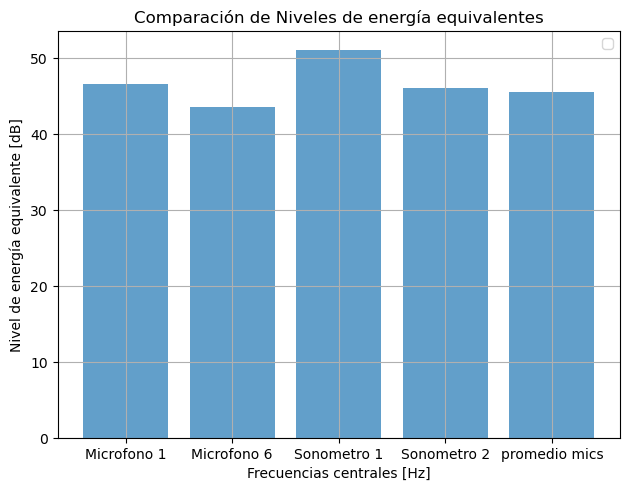

In [14]:
total_leq_1 =  auf.sum_bands(octave_bands_leq_1)
total_leq_6 =  auf.sum_bands(octave_bands_leq_6)
total_leq_s1 = auf.sum_bands(octave_bands_leq_s1)
total_leq_s2 = auf.sum_bands(octave_bands_leq_s2)
total_avg_leq = auf.sum_bands(avg_octave_leq_nf)

leqs = {"leq":[total_leq_1, total_leq_6, total_leq_s1, total_leq_s2, total_avg_leq]}
categories = ["Microfono 1", "Microfono 6", "Sonometro 1", "Sonometro 2", "promedio mics"]
title = "Comparación de Niveles de energía equivalentes"
plot.plot_leqs(leqs, x=categories, title=title, info_type="categories")

A partir de estos 8 gráficos sacamos las siguientes conclusiones:
- Ambos sonómetros registraron mayores niveles de ruido que sus micrófonos correspondientes. Al indagar en las condiciones de cada medición notamos que el tiempo de resgistro de cada sonómetro, 21 segundos para el primero y 23 segundos para el segundo, es mayor al tiempo de registro de los micrófonos, por lo que una de nuestras a hipótesis sobre este comportamiento se basa en la mayor integración de ruido por parte de los sonómetros pero que no tiene mucho sentido dado que el LEQ es el promedio energético en un intervalo de tiempo. Otra hipótesis se basa en la calibración de los micrófonos, en donde al escuchar los audios se aprecia ruido de fondo y sugiere que los 94 dB SPL de la misma corresponden al tono puro de referencia + el ruido de fondo. De esta forma la referencia real se ubicaría levemente por debajo de 94 dB SPL.


- El piso de ruido captado por el microfono en las ventanas es levemente mayor al registrado por el microfono ubicado en las puertas. Dicho comportamiento se corresponde con la diferencia entre ambos sonómetros.

<h2>Ruido emitido por la fuente</h2>

Como mencionamos previamente, la norma indica que la fuente debe alcanzar por lo menos 35 dB por encima del piso de ruido en cada banda. Para asegurarse de que es posible, se debe emitir ruido de espectro plano en frecuencia (ruido rosa). Vamos a repetir el análisis realizado con el piso de ruido. 

Durante la medición se cometió un error con el ruido, por lo que el emitido fue ruido blanco. La diferencia entre el ruido blanco y ruido rosa radica en que este último disminuye 3 decibeles la energía por cada duplicación de frecuencia. Podemos aproximar las muestras reduciendo la energía 3 dB por octava. 

In [15]:
#cargamos todas las grabaciones de ruido emitido por la fuente en ambas posiciones
#posicion 1
rr_m1_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 1 - Earthworks M30_11.wav")[0]
rr_m2_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 2 - Earthworks M30_11.wav")[0]
rr_m3_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 3 - Behringer ecm 8000_13.wav")[0]
rr_m4_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 4 - Behringer ecm 8000_12.wav")[0]
rr_m5_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 5 - Behringer ecm 8000_12.wav")[0]
rr_m6_f1 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 1/MIC 6 - Behringer ecm 8000_12.wav")[0]

#posicion 2
rr_m1_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 1 - Earthworks M30_12.wav")[0]
rr_m2_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 2 - Earthworks M30_12.wav")[0]
rr_m3_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 3 - Behringer ecm 8000_14.wav")[0]
rr_m4_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 4 - Behringer ecm 8000_13.wav")[0]
rr_m5_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 5 - Behringer ecm 8000_13.wav")[0]
rr_m6_f2 = auf.load_audio("2 - CASO 1 - AULA VACIA/1 - RUIDO ROSA/MEDICION 2/MIC 6 - Behringer ecm 8000_13.wav")[0]

Como hicimos con todas las muestras de piso de ruido, calcularemos el nivel sonoro continuo equivalente para cada banda de análisis y promediaremos. La diferencia es que para hacer la corrección del ruido blanco a rosa, aproximaremos el LEQ reduciendo 3 db por numero de banda en el caso de las octavas, y un dB por numero de tercio de octava en el caso de las bandas de octava. El objetivo de esta corrección es poder eliminar parte de la energía extra por duplicación de frecuencia que entrega el ruido blanco con respecto al ruido rosa.

In [16]:
#posicion 1

lista_audios_rr1 = [rr_m1_f1, rr_m2_f1,  rr_m3_f1,  rr_m4_f1, rr_m5_f1, rr_m6_f1]

all_thirds_leq_f1 = []
all_octaves_leq_f1 = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(lista_audios_rr1):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[str(i+1)])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[str(i+1)])

    all_thirds_leq_f1.append(auf.np.array(thirds_leq))
    all_octaves_leq_f1.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_f1 = auf.np.array(all_thirds_leq_f1)
all_octaves_leq_f1 = auf.np.array(all_octaves_leq_f1)

#repito el procedimiento para la posicion 2:

lista_audios_rr2 = [rr_m1_f2, rr_m2_f2,  rr_m3_f2,  rr_m4_f2, rr_m5_f2, rr_m6_f2 ]

all_thirds_leq_f2 = []
all_octaves_leq_f2 = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(lista_audios_rr2):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[str(i+1)])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[str(i+1)])

    all_thirds_leq_f2.append(auf.np.array(thirds_leq))
    all_octaves_leq_f2.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_f2 = auf.np.array(all_thirds_leq_f2)
all_octaves_leq_f2 = auf.np.array(all_octaves_leq_f2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


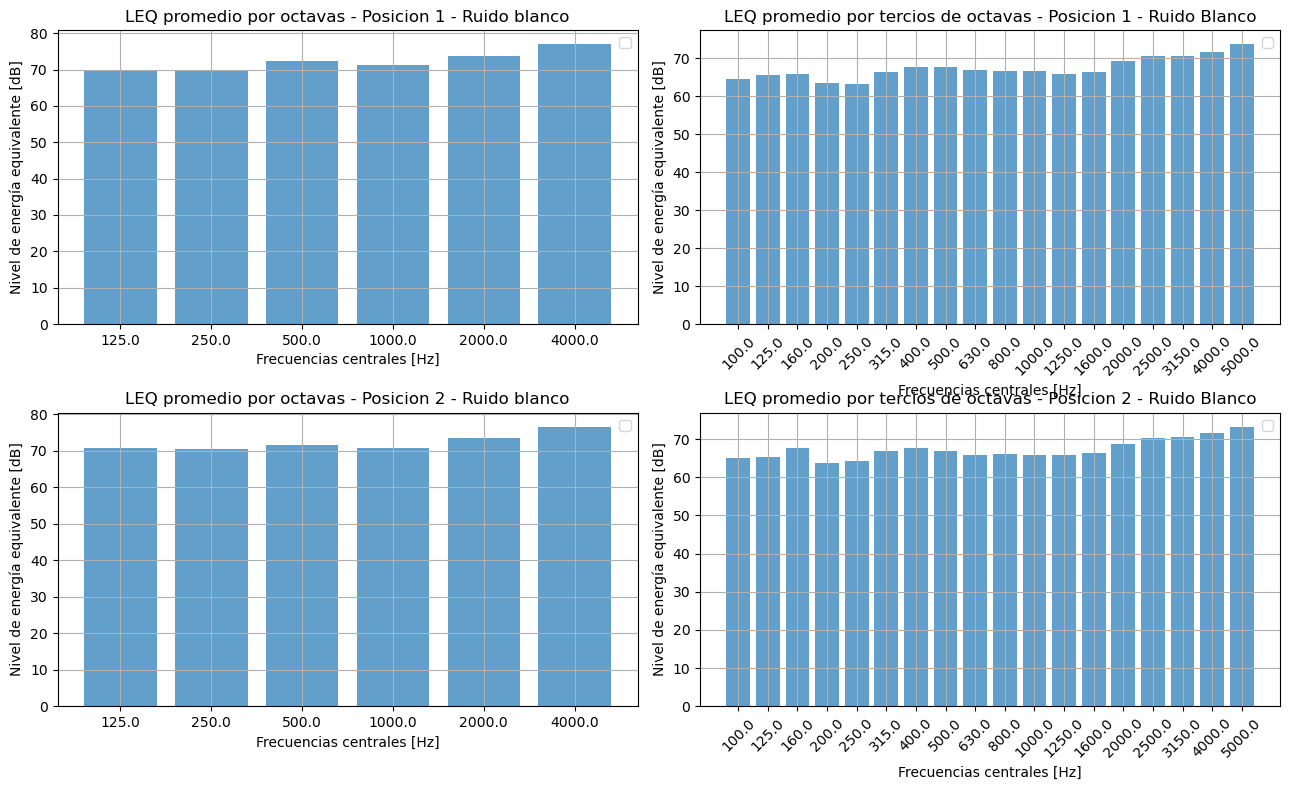

In [17]:
avg_thirds_leq_f1 = auf.np.mean(all_thirds_leq_f1, axis=0)
avg_octave_leq_f1 = auf.np.mean(all_octaves_leq_f1, axis=0)
avg_thirds_leq_f2 = auf.np.mean(all_thirds_leq_f2, axis=0)
avg_octave_leq_f2 = auf.np.mean(all_octaves_leq_f2, axis=0)

all_octave_leq_plot1 = {"leq":avg_octave_leq_f1} 
all_octave_leq_plot2 = {"leq":avg_octave_leq_f2} 
all_thirds_leq_plot1 = {"leq":avg_thirds_leq_f1} 
all_thirds_leq_plot2 = {"leq":avg_thirds_leq_f2} 

title = ["LEQ promedio por octavas - Posicion 1 - Ruido blanco", "LEQ promedio por tercios de octavas - Posicion 1 - Ruido Blanco", "LEQ promedio por octavas - Posicion 2 - Ruido blanco", "LEQ promedio por tercios de octavas - Posicion 2 - Ruido Blanco"]
octaves_leq_plot1 =  lambda: plot.plot_leqs(all_octave_leq_plot1, x=nominal_oct_central_freqs, title=title[0], show=False)
thirds_leq_plot1 =  lambda: plot.plot_leqs(all_thirds_leq_plot1, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)
octaves_leq_plot2 =  lambda: plot.plot_leqs(all_octave_leq_plot2, x=nominal_oct_central_freqs, title=title[2], show=False)
thirds_leq_plot2 =  lambda: plot.plot_leqs(all_thirds_leq_plot2, x=nominal_thirds_central_freqs, title=title[3], rotate=True, show=False)

plot.multiplot(octaves_leq_plot1, thirds_leq_plot1, octaves_leq_plot2, thirds_leq_plot2, figsize=(13, 8)) 

Promedio directamente todo

In [18]:
lista_audios_rr1 = [rr_m1_f1, rr_m2_f1,  rr_m3_f1,  rr_m4_f1, rr_m5_f1, rr_m6_f1]
lista_audios_rr2 = [rr_m1_f2, rr_m2_f2,  rr_m3_f2,  rr_m4_f2, rr_m5_f2, rr_m6_f2 ]

all_thirds_leq_rr = []
all_octaves_leq_rr = []

#calculo el leq para cada banda para todos los audios y los guardo en una lista para q ancho de banda

for i, audio in enumerate(lista_audios_rr1):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[str(i+1)])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[str(i+1)])

    all_thirds_leq_rr.append(auf.np.array(thirds_leq))
    all_octaves_leq_rr.append(auf.np.array(ocatves_leq))

for i, audio in enumerate(lista_audios_rr2):
    ocatves_leq = auf.leq_by_bands(audio, octave_filters_bank, calibraciones[str(i+1)])
    thirds_leq = auf.leq_by_bands(audio, thirds_filters_bank, calibraciones[str(i+1)])

    all_thirds_leq_rr.append(auf.np.array(thirds_leq))
    all_octaves_leq_rr.append(auf.np.array(ocatves_leq))

#paso a las listas a un numpy array para poder hacer el promedio entre bandas

all_thirds_leq_rr = auf.np.array(all_thirds_leq_rr)
all_octaves_leq_rr = auf.np.array(all_octaves_leq_rr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


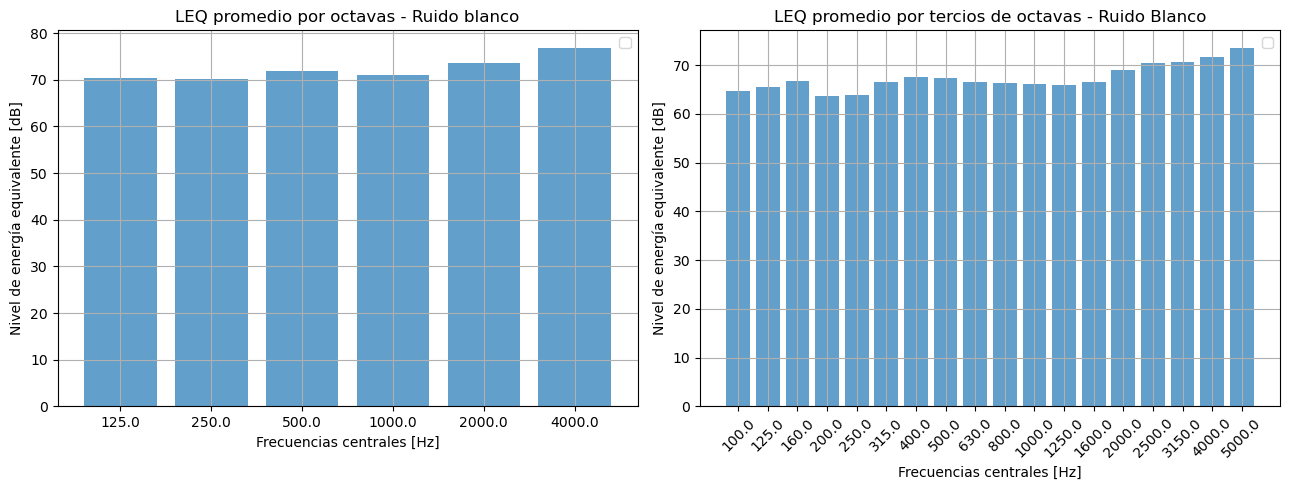

In [20]:
avg_thirds_leq_rr = auf.np.mean(all_thirds_leq_rr, axis=0)
avg_octave_leq_rr = auf.np.mean(all_octaves_leq_rr, axis=0)

all_octave_leq_plot_rr = {"leq":avg_octave_leq_rr} 
all_thirds_leq_plot_rr = {"leq":avg_thirds_leq_rr} 

title = ["LEQ promedio por octavas - Ruido blanco", "LEQ promedio por tercios de octavas - Ruido Blanco"]
octaves_leq_plot_rr =  lambda: plot.plot_leqs(all_octave_leq_plot_rr, x=nominal_oct_central_freqs, title=title[0], show=False)
thirds_leq_plot_rr =  lambda: plot.plot_leqs(all_thirds_leq_plot_rr, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_rr, thirds_leq_plot_rr, figsize=(13, 5)) 

Podemos observar que a pesar de que el nivel del piso de ruido es mayor en frecuencias bajas que en frecuencias altas (como pudimos notar en el analísis de piso de ruido), se mantiene cierta linealidad. ????????????????????????????????????????

Aplico la corrección:

In [21]:
cantidad_octavas = len(nominal_oct_central_freqs)
cantidad_tercios = len(nominal_thirds_central_freqs)

reduccion_octavas = auf.np.arange(cantidad_octavas) * 3
reduccion_tercios = auf.np.arange(cantidad_tercios)

avg_thirds_leq_rr_corr = avg_thirds_leq_rr - reduccion_tercios
avg_octave_leq_rr_corr = avg_octave_leq_rr - reduccion_octavas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


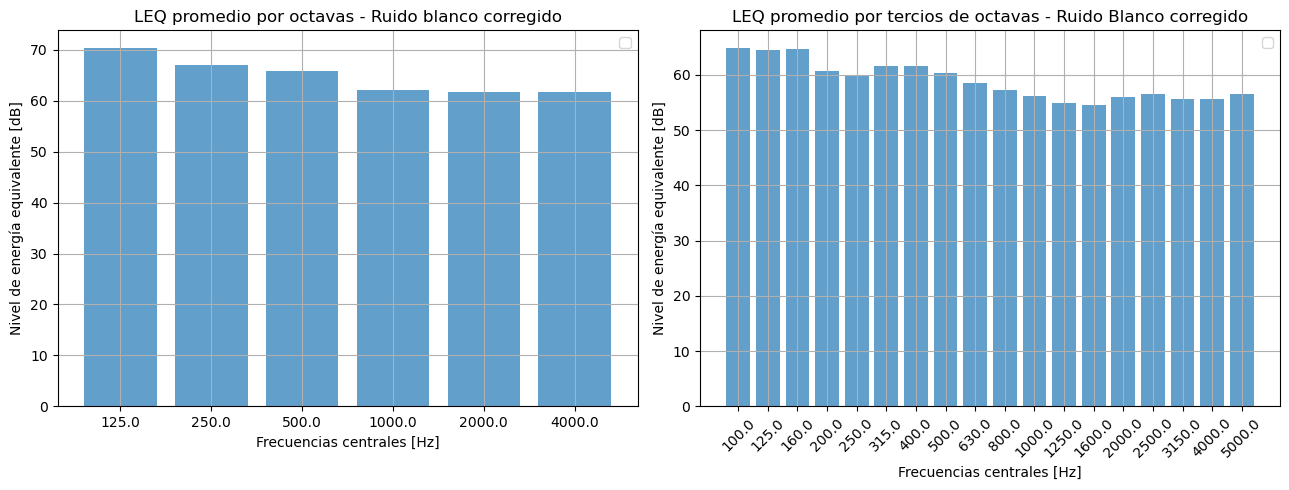

In [22]:
octave_rr_corr_plot = {"leq":avg_octave_leq_rr_corr} 
thirds_rr_corr_plot = {"leq":avg_thirds_leq_rr_corr} 

title = ["LEQ promedio por octavas - Ruido blanco corregido", "LEQ promedio por tercios de octavas - Ruido Blanco corregido"]
octaves_leq_plot_corr =  lambda: plot.plot_leqs(octave_rr_corr_plot, x=nominal_oct_central_freqs, title=title[0], show=False)
thirds_leq_plot_corr =  lambda: plot.plot_leqs(thirds_rr_corr_plot, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_corr, thirds_leq_plot_corr, figsize=(13, 5)) 

Comparo corrección con no corregido

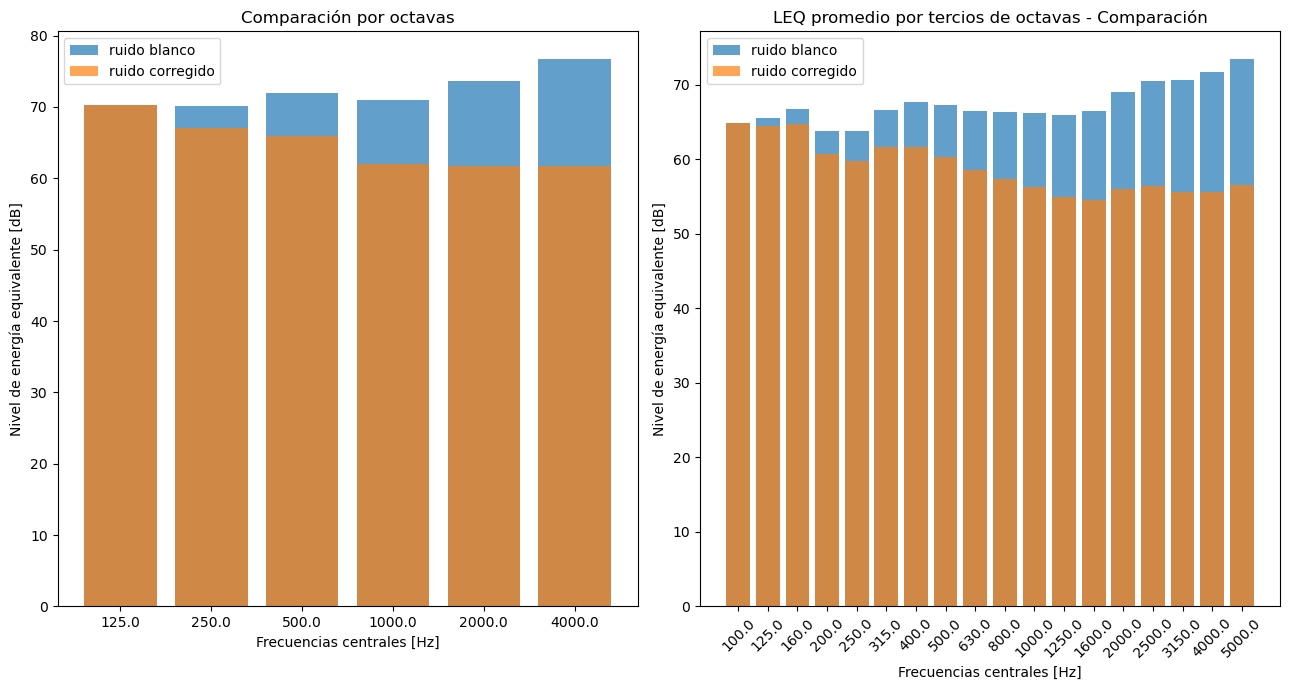

In [28]:
all_octave_rb_plot = {"leq":avg_octave_leq_rr, "label":"ruido blanco"} 
all_thirds_rb_plot = {"leq":avg_thirds_leq_rr, "label":"ruido blanco"} 
all_octave_corr_plot = {"leq":avg_octave_leq_rr_corr, "label":"ruido corregido"} 
all_thirds_corr_plot = {"leq":avg_thirds_leq_rr_corr, "label":"ruido corregido"} 

title = ["Comparación por octavas", "LEQ promedio por tercios de octavas - Comparación"]

octaves_leq_plot_rr =  lambda: plot.plot_leqs(all_octave_rb_plot, all_octave_corr_plot, x=nominal_oct_central_freqs, title=title[0], show=False)
thirds_leq_plot_rr =  lambda: plot.plot_leqs(all_thirds_rb_plot, all_thirds_corr_plot, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(octaves_leq_plot_rr, thirds_leq_plot_rr, figsize=(13, 7)) 

Conclusiones???
Medimos la diferencia entre el piso de ruido promedio y ruido corregido promedio:

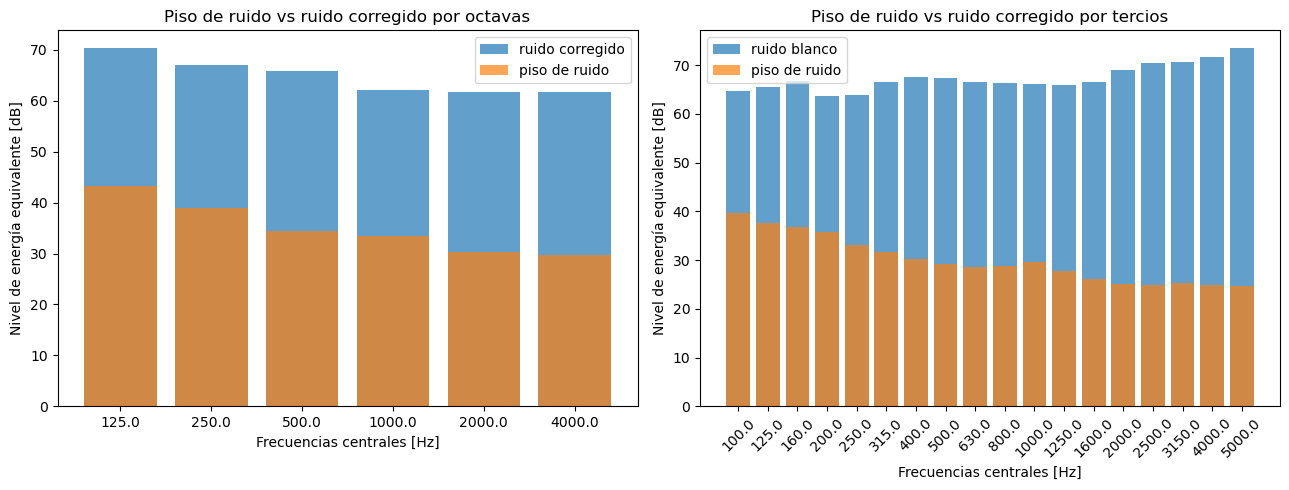

In [29]:
#rd: rango dinámico

all_octave_leq_nf_plot = {"leq":avg_octave_leq_nf, "label":"piso de ruido"} 
all_thirds_leq_nf_plot = {"leq":avg_thirds_leq_nf, "label":"piso de ruido"} 

title = ["Piso de ruido vs ruido corregido por octavas", "Piso de ruido vs ruido corregido por tercios"]

rd_octaves_plot =  lambda: plot.plot_leqs(all_octave_corr_plot, all_octave_leq_nf_plot, x=nominal_oct_central_freqs, title=title[0], show=False)
rd_thirds_plot=  lambda: plot.plot_leqs(all_thirds_rb_plot, all_thirds_leq_nf_plot, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(rd_octaves_plot, rd_thirds_plot, figsize=(13, 5)) 

Diferencia de nivel 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


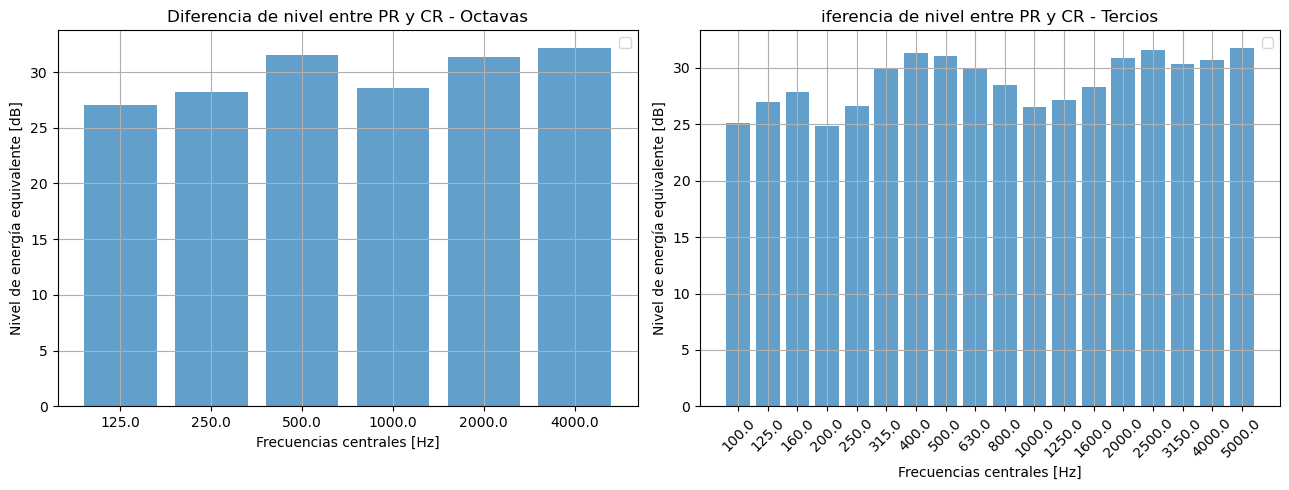

In [31]:
dif_octaves = avg_octave_leq_rr_corr - avg_octave_leq_nf
dif_thirds = avg_thirds_leq_rr_corr - avg_thirds_leq_nf

dif_octaves_plot_data = {"leq":dif_octaves} 
dif_thirds_plot_data = {"leq":dif_thirds} 

title = ["Diferencia de nivel entre PR y CR - Octavas", "iferencia de nivel entre PR y CR - Tercios"]
dif_octaves_plot =  lambda: plot.plot_leqs(dif_octaves_plot_data, x=nominal_oct_central_freqs, title=title[0], show=False)
dif_thirds_plot =  lambda: plot.plot_leqs(dif_thirds_plot_data, x=nominal_thirds_central_freqs, title=title[1], rotate=True, show=False)

plot.multiplot(dif_octaves_plot, dif_thirds_plot, figsize=(13, 5)) 

<h1>Respuesta al impulso</h1>